### Write a class providing a method for the numerical determination of the minimum of a given function

Suppose for instance to have the function defined below:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def polyfun(x):
    coef=np.array([2.5, -10., 14., -7., 1.7])
    
    return np.polyval(coef, x)

It is a polynomial of the type

$$y = c_4x^4 + c_3x^3 + c_2x^2 + c_1x^1 + c_0$$

where the coefficients $(c_4, c_3, c_2, c_1, c_0)$ are stored in the array *coef*. The plot of the function in the range $[-1., 1.5]$ is presented below:

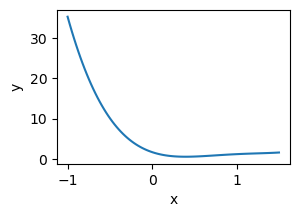

In [2]:
x_list=np.linspace(-1., 1.5, 100)
y_list=polyfun(x_list)

plt.figure(figsize=(3,2))
plt.plot(x_list,y_list)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

so, the minimum of $y$ in that range is not far from $x=0.5$.

A simple strategy for finding the minimum employes the method *argmin* from the *numpy* library; precisely:

- compute the list of *y* values for a list of *x* values around the *guessed* minimum (0.5);
- find the position of the minimum value of *y* within the *y* list  (*pos=argmin(y)*)
- find the *x* value, within the *x* list, corresponding to the minimum *y* (*x\[pos\]*)

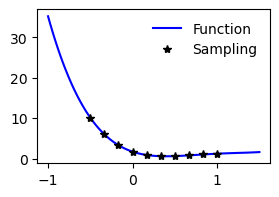

In [3]:
x_sample=np.linspace(-0.5, 1., 10)
y_sample=polyfun(x_sample)

plt.figure(figsize=(3,2))
plt.plot(x_list, y_list, "b-", label="Function")
plt.plot(x_sample, y_sample, "k*", label="Sampling")
plt.legend(frameon=False)
plt.xlabel="x"
plt.ylabel="y"
plt.show()

From this initial sampling, we can get an approximate position of the minimum at:

In [4]:
y_min_pos=np.argmin(y_sample)
x_approx=x_sample[y_min_pos]
print("Approximated x at the minimum: %6.2f" % x_approx)
print("Nearby points at %6.2f and %6.2f" % (x_sample[y_min_pos-1], x_sample[y_min_pos+1])) 

Approximated x at the minimum:   0.33
Nearby points at   0.17 and   0.50


Then we can repeat the procedure in a restricted interval around the approximated minimum found:

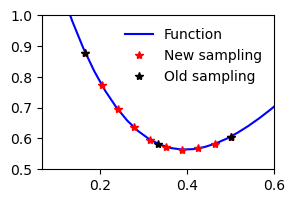

In [5]:
x_min=x_sample[y_min_pos-1]
x_max=x_sample[y_min_pos+1]

x_new_sample=np.linspace(x_min, x_max, 10)
y_new_sample=polyfun(x_new_sample)

plt.figure(figsize=(3,2))
plt.plot(x_list, y_list, "b-", label="Function")
plt.plot(x_new_sample, y_new_sample, "r*", label="New sampling")
plt.plot(x_sample, y_sample, "k*", label="Old sampling")
plt.xlim(x_min-0.1, x_max+0.1)
plt.ylim(0.5, 1.0)
plt.legend(frameon=False)
plt.xlabel="x"
plt.ylabel="y"
plt.show()

In [6]:
y_min_pos=np.argmin(y_new_sample)
x_approx=x_new_sample[y_min_pos]
print("Approximated x at the minimum: %6.2f" % x_approx)
print("Nearby points at %6.2f and %6.2f" % (x_new_sample[y_min_pos-1], x_new_sample[y_min_pos+1])) 

Approximated x at the minimum:   0.39
Nearby points at   0.35 and   0.43


The procedure should be repeated until the required resolution has been obtained, by progressively reducing the range around the approximated minimum found at each step. 

Write down your own code and compare it with the class defined in the module *exercise_4_complete.py*, whose usage is illustrated in the cell below:

In [7]:
from exercise_4_complete import Mini

Mini.set_precision(1e-9)
Mini.info()
Mini.findmin(polyfun, 0.5)


Minimization:

Threshold: 1.0e-09;
N. points:  10;
Max iterations:  100;
Initial Range:    2.00


Iteration:   1; range: 2.0000e+00;  x_diff: 1.1111e-01; x_min_approx: 3.88888889e-01
Iteration:   2; range: 4.9383e-02;  x_diff: 1.2346e-01; x_min_approx: 3.76543210e-01
Iteration:   3; range: 1.0974e-02;  x_diff: 1.6461e-02; x_min_approx: 3.93004115e-01
Iteration:   4; range: 2.4387e-03;  x_diff: 3.6580e-03; x_min_approx: 3.96662094e-01
Iteration:   5; range: 5.4192e-04;  x_diff: 1.3548e-03; x_min_approx: 3.95307287e-01
Iteration:   6; range: 1.2043e-04;  x_diff: 1.8064e-04; x_min_approx: 3.95487928e-01
Iteration:   7; range: 2.6762e-05;  x_diff: 1.3381e-05; x_min_approx: 3.95501309e-01
Iteration:   8; range: 5.9470e-06;  x_diff: 2.9735e-06; x_min_approx: 3.95498335e-01
Iteration:   9; range: 1.3216e-06;  x_diff: 1.9823e-06; x_min_approx: 3.95496353e-01
Iteration:  10; range: 2.9368e-07;  x_diff: 1.4684e-07; x_min_approx: 3.95496206e-01
Iteration:  11; range: 6.5262e-08;  x_diff: 9.7893e

#### Check of the method by using the function *minimize* from the scipy.optimize library 

In [8]:
from scipy.optimize import minimize

guess=0.5

print("\n-----  Scipy Optimization  ----\n")
mx_scipy=minimize(polyfun, guess, method='SLSQP',\
                  options={'disp': True, 'ftol': 1e-15, 'eps': 1e-9})
print("\n            x min = %10.8f " %\
      mx_scipy.x[0])


-----  Scipy Optimization  ----

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.5639096477084133
            Iterations: 8
            Function evaluations: 18
            Gradient evaluations: 8

            x min = 0.39549614 
